### <p style="padding:10px;background-color:green;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px ;overflow:hidden;font-weight:300">🍕Importing Libraries🍕</p>

In [1]:
import numpy as np # numerical python
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # seaborn - data visualization package
import matplotlib.pyplot as plt # plotting library
import plotly.express as px
import calmap

In [2]:
# !pip install calmap

### <p style="padding:10px;background-color:green;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px ;overflow:hidden;font-weight:300">🍕Loading Data Set🍕</p>

In [3]:
df=pd.read_excel("Data Model - Pizza Sales.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [5]:
df.shape # there are 48620 rows and 12 columns

(48620, 12)

In [6]:
df.sample(4)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
21284,21285,9331,napolitana_l,2,2015-06-06,12:40:05,20.50,41.00,L,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
8998,8999,3940,veggie_veg_m,1,2015-03-08,12:29:28,16.00,16.00,M,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",The Vegetables + Vegetables Pizza
32232,32233,14243,southw_ckn_l,1,2015-08-26,14:08:33,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
38918,38919,17156,classic_dlx_m,1,2015-10-17,21:27:29,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


Converting the sting of ingredients into list of ingredients

In [7]:
df['ingredients_list'] = df['pizza_ingredients'].str.split(',')

Cleaned data of the 'ingredients_list' column by removing leading and tailing space in the ingredient name

In [8]:
idx = 0
print('Give some time for execution of cell...')
for item in df['ingredients_list']:
    df['ingredients_list'][idx] = [i.strip() for i in item]
    idx = idx + 1
    if idx%10000 == 0:
        print(idx,'rows processed')
print('Completed')
df.head()

Give some time for execution of cell...


C:\Users\priya\AppData\Local\Temp\ipykernel_28668\2877377320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ingredients_list'][idx] = [i.strip() for i in item]


10000 rows processed
20000 rows processed
30000 rows processed
40000 rows processed
Completed


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,ingredients_list
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,"[Sliced Ham, Pineapple, Mozzarella Cheese]"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,"[Pepperoni, Mushrooms, Red Onions, Red Peppers..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,"[Mozzarella Cheese, Provolone Cheese, Smoked G..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,"[Calabrese Salami, Capocollo, Tomatoes, Red On..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,"[Tomatoes, Red Peppers, Jalapeno Peppers, Red ..."


#### Adding the required columns for better Analysis

In [9]:
df['Day_Of_Week']=df['order_date'].dt.day_name() #adding a column Day_Of_Week to store which day of week it is eg: Monday

In [10]:
df['Day']=df['order_date'].dt.day #adding a column Day to know Day in a Month

In [11]:
df['Hour']=df.apply(lambda row: str(row.order_time)[:2], axis=1)

In [12]:
df.sample(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,ingredients_list,Day_Of_Week,Day,Hour
29817,29818,13170,spicy_ital_l,1,2015-08-08,16:12:47,20.75,20.75,L,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza,"[Capocollo, Tomatoes, Goat Cheese, Artichokes,...",Saturday,8,16
2543,2544,1127,pep_msh_pep_s,1,2015-01-19,18:53:52,11.00,11.00,S,Classic,"Pepperoni, Mushrooms, Green Peppers","The Pepperoni, Mushroom, and Peppers Pizza","[Pepperoni, Mushrooms, Green Peppers]",Monday,19,18
43162,43163,18975,green_garden_s,1,2015-11-20,14:28:38,12.00,12.00,S,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",The Green Garden Pizza,"[Spinach, Mushrooms, Tomatoes, Green Olives, F...",Friday,20,14
45944,45945,20169,big_meat_s,1,2015-12-09,15:04:51,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza,"[Bacon, Pepperoni, Italian Sausage, Chorizo Sa...",Wednesday,9,15
4350,4351,1935,prsc_argla_m,1,2015-02-02,11:24:47,16.50,16.50,M,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza,"[Prosciutto di San Daniele, Arugula, Mozzarell...",Monday,2,11


<div class="alert alert-success"><strong>1. Which pizza types sell most?</strong></div>

####  &#10148; most sold pizza type based on pizza_size

In [13]:
df['pizza_size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [14]:
df_piz_size=df.groupby('pizza_size').sum()['quantity'].reset_index(name='Count')
df_piz_size

,pizza_size,Count
0,L,18956
1,M,15635
2,S,14403
3,XL,552
4,XXL,28


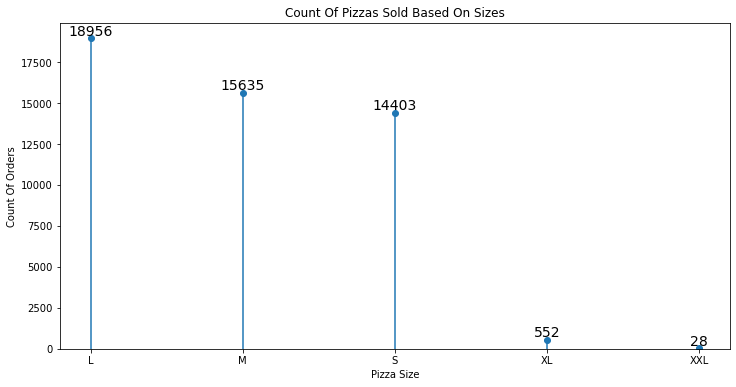

In [15]:
#lollipop chart
# creating an empty chart
fig, axes = plt.subplots()
axes.vlines(df_piz_size['pizza_size'], ymin=0, ymax= df_piz_size['Count'])
  
# drawing the markers (circle)
axes.plot(df_piz_size['pizza_size'],  df_piz_size['Count'], "o")
  
# formatting and details
axes.set_ylim(0)
fig.set_figheight(6)
fig.set_figwidth(12)
plt.title('Count Of Pizzas Sold Based On Sizes')
plt.xlabel('Pizza Size')
plt.ylabel('Count Of Orders')
plt.xticks(df_piz_size['pizza_size'])

# to give numbers at the top of each lollipop
for row in df_piz_size.itertuples():
    axes.text(row.Index, row.Count,s=row.Count, horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
plt.show()

### Insights from above plot
- As Large size Pizzas are the most sold it is can be  advised to buy large size base and but preey less XXL size bases as they are least sold and only 

#### ➤ most sold pizza type based on pizza_category

In [16]:
df['pizza_category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [17]:
df_pizza_category=df.groupby('pizza_category').sum()['quantity'].reset_index(name='Count')
df_pizza_category

,pizza_category,Count
0,Chicken,11050
1,Classic,14888
2,Supreme,11987
3,Veggie,11649


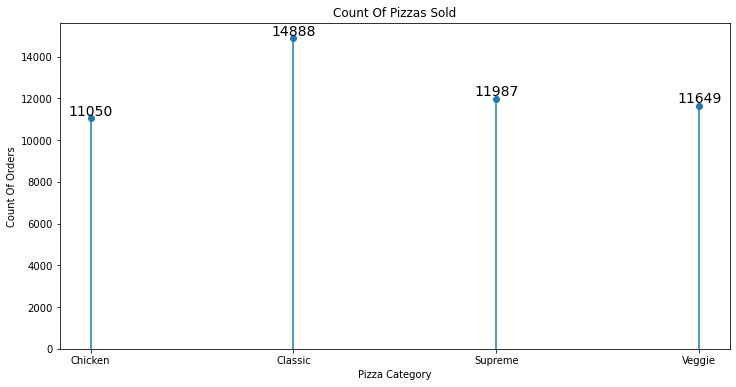

In [18]:
#lollipop chart
# creating an empty chart
fig, axes = plt.subplots()
axes.vlines(df_pizza_category['pizza_category'], ymin=0, ymax= df_pizza_category['Count'])
  
# drawing the markers (circle)
axes.plot(df_pizza_category['pizza_category'],  df_pizza_category['Count'], "o")
  
# formatting and details
axes.set_ylim(0)
fig.set_figheight(6)
fig.set_figwidth(12)
plt.title('Count Of Pizzas Sold')
plt.xlabel('Pizza Category')
plt.ylabel('Count Of Orders')
plt.xticks(df_pizza_category['pizza_category'])

# to give numbers at the top of each lollipop
for row in df_pizza_category.itertuples():
    axes.text(row.Index, row.Count,s=row.Count, horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
plt.show()

### Insights from above plot
- Classic pizza is the most sold Pizza

➤ most sold pizza type based on pizza_name

In [19]:
# Grouping the records as per pizza_name and summing up the quantity of pizzas ordered in each arder
pizzaName_df = df.groupby(['pizza_name']).sum()['quantity'].to_frame()
# Finding the most sold pizza by finding max() of the quantity column
pizzaName_df[pizzaName_df['quantity'] == pizzaName_df['quantity'].max()]

,quantity
pizza_name,
The Classic Deluxe Pizza,2453


In [20]:
df['pizza_name'].unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

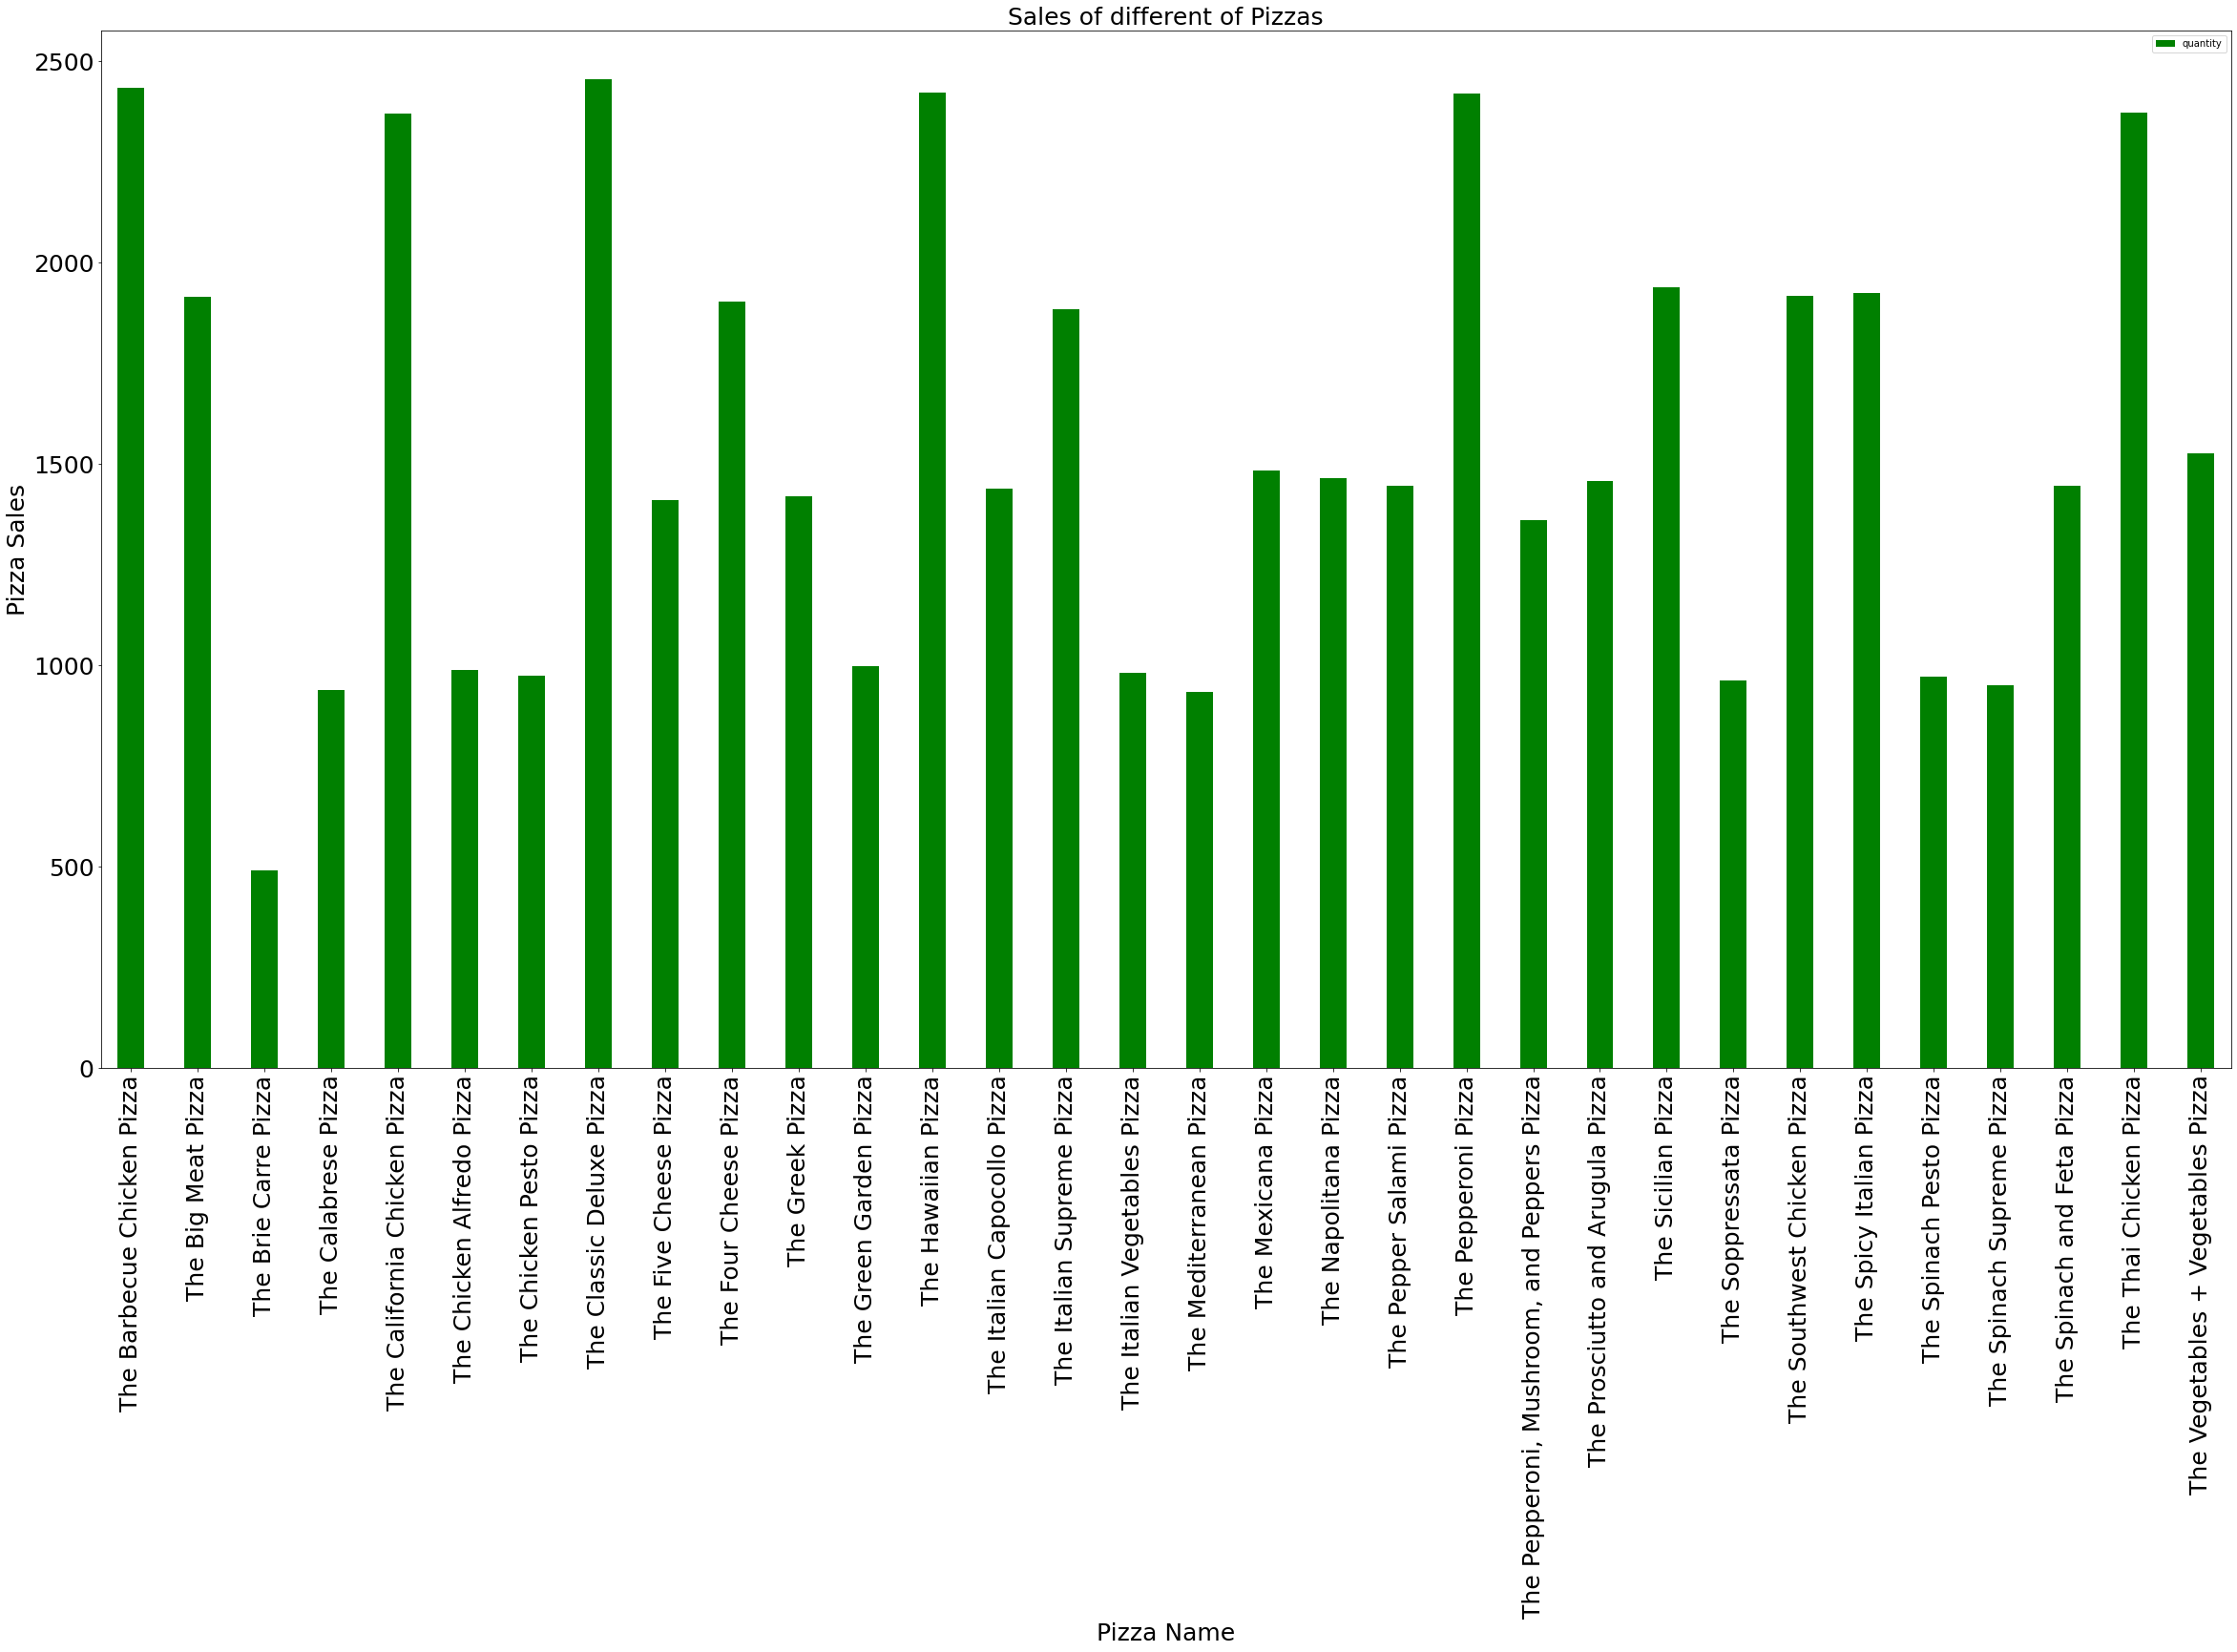

In [21]:
pizzaName_df.plot(kind='bar',color ='green',width=0.4,figsize=(40,20),fontsize=25)
plt.xlabel('Pizza Name',fontsize=25)
plt.xticks(rotation = 90) 
plt.ylabel('Pizza Sales',fontsize=25)
plt.title('Sales of different of Pizzas',fontsize=25)
plt.show()

### Insights from above plot
- The Classic Deluxe Pizza is the most sold pizza
- The Brie Carre Pizza is the least sold pizza

<div class="alert alert-success"><strong>2. Which ingredients are in demand?</strong></div>

In [22]:
ingredients_count=df['pizza_ingredients'].str.split(',').apply(lambda x: [e.strip() for e in x]).explode()
ing_df=ingredients_count.value_counts().to_frame()
ing_df.reset_index(inplace=True)
ing_df = ing_df.rename(columns = {'pizza_ingredients':'count','index':'pizza_ingredients'})

In [23]:
ing_df

,pizza_ingredients,count
0,Garlic,27422
1,Tomatoes,26601
2,Red Onions,19547
3,Red Peppers,16284
4,Mozzarella Cheese,10333
...,...,...
60,Brie Carre Cheese,480
61,Prosciutto,480
62,Caramelized Onions,480
63,Pears,480


C:\Users\priya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24923 (\N{CJK UNIFIED IDEOGRAPH-615B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


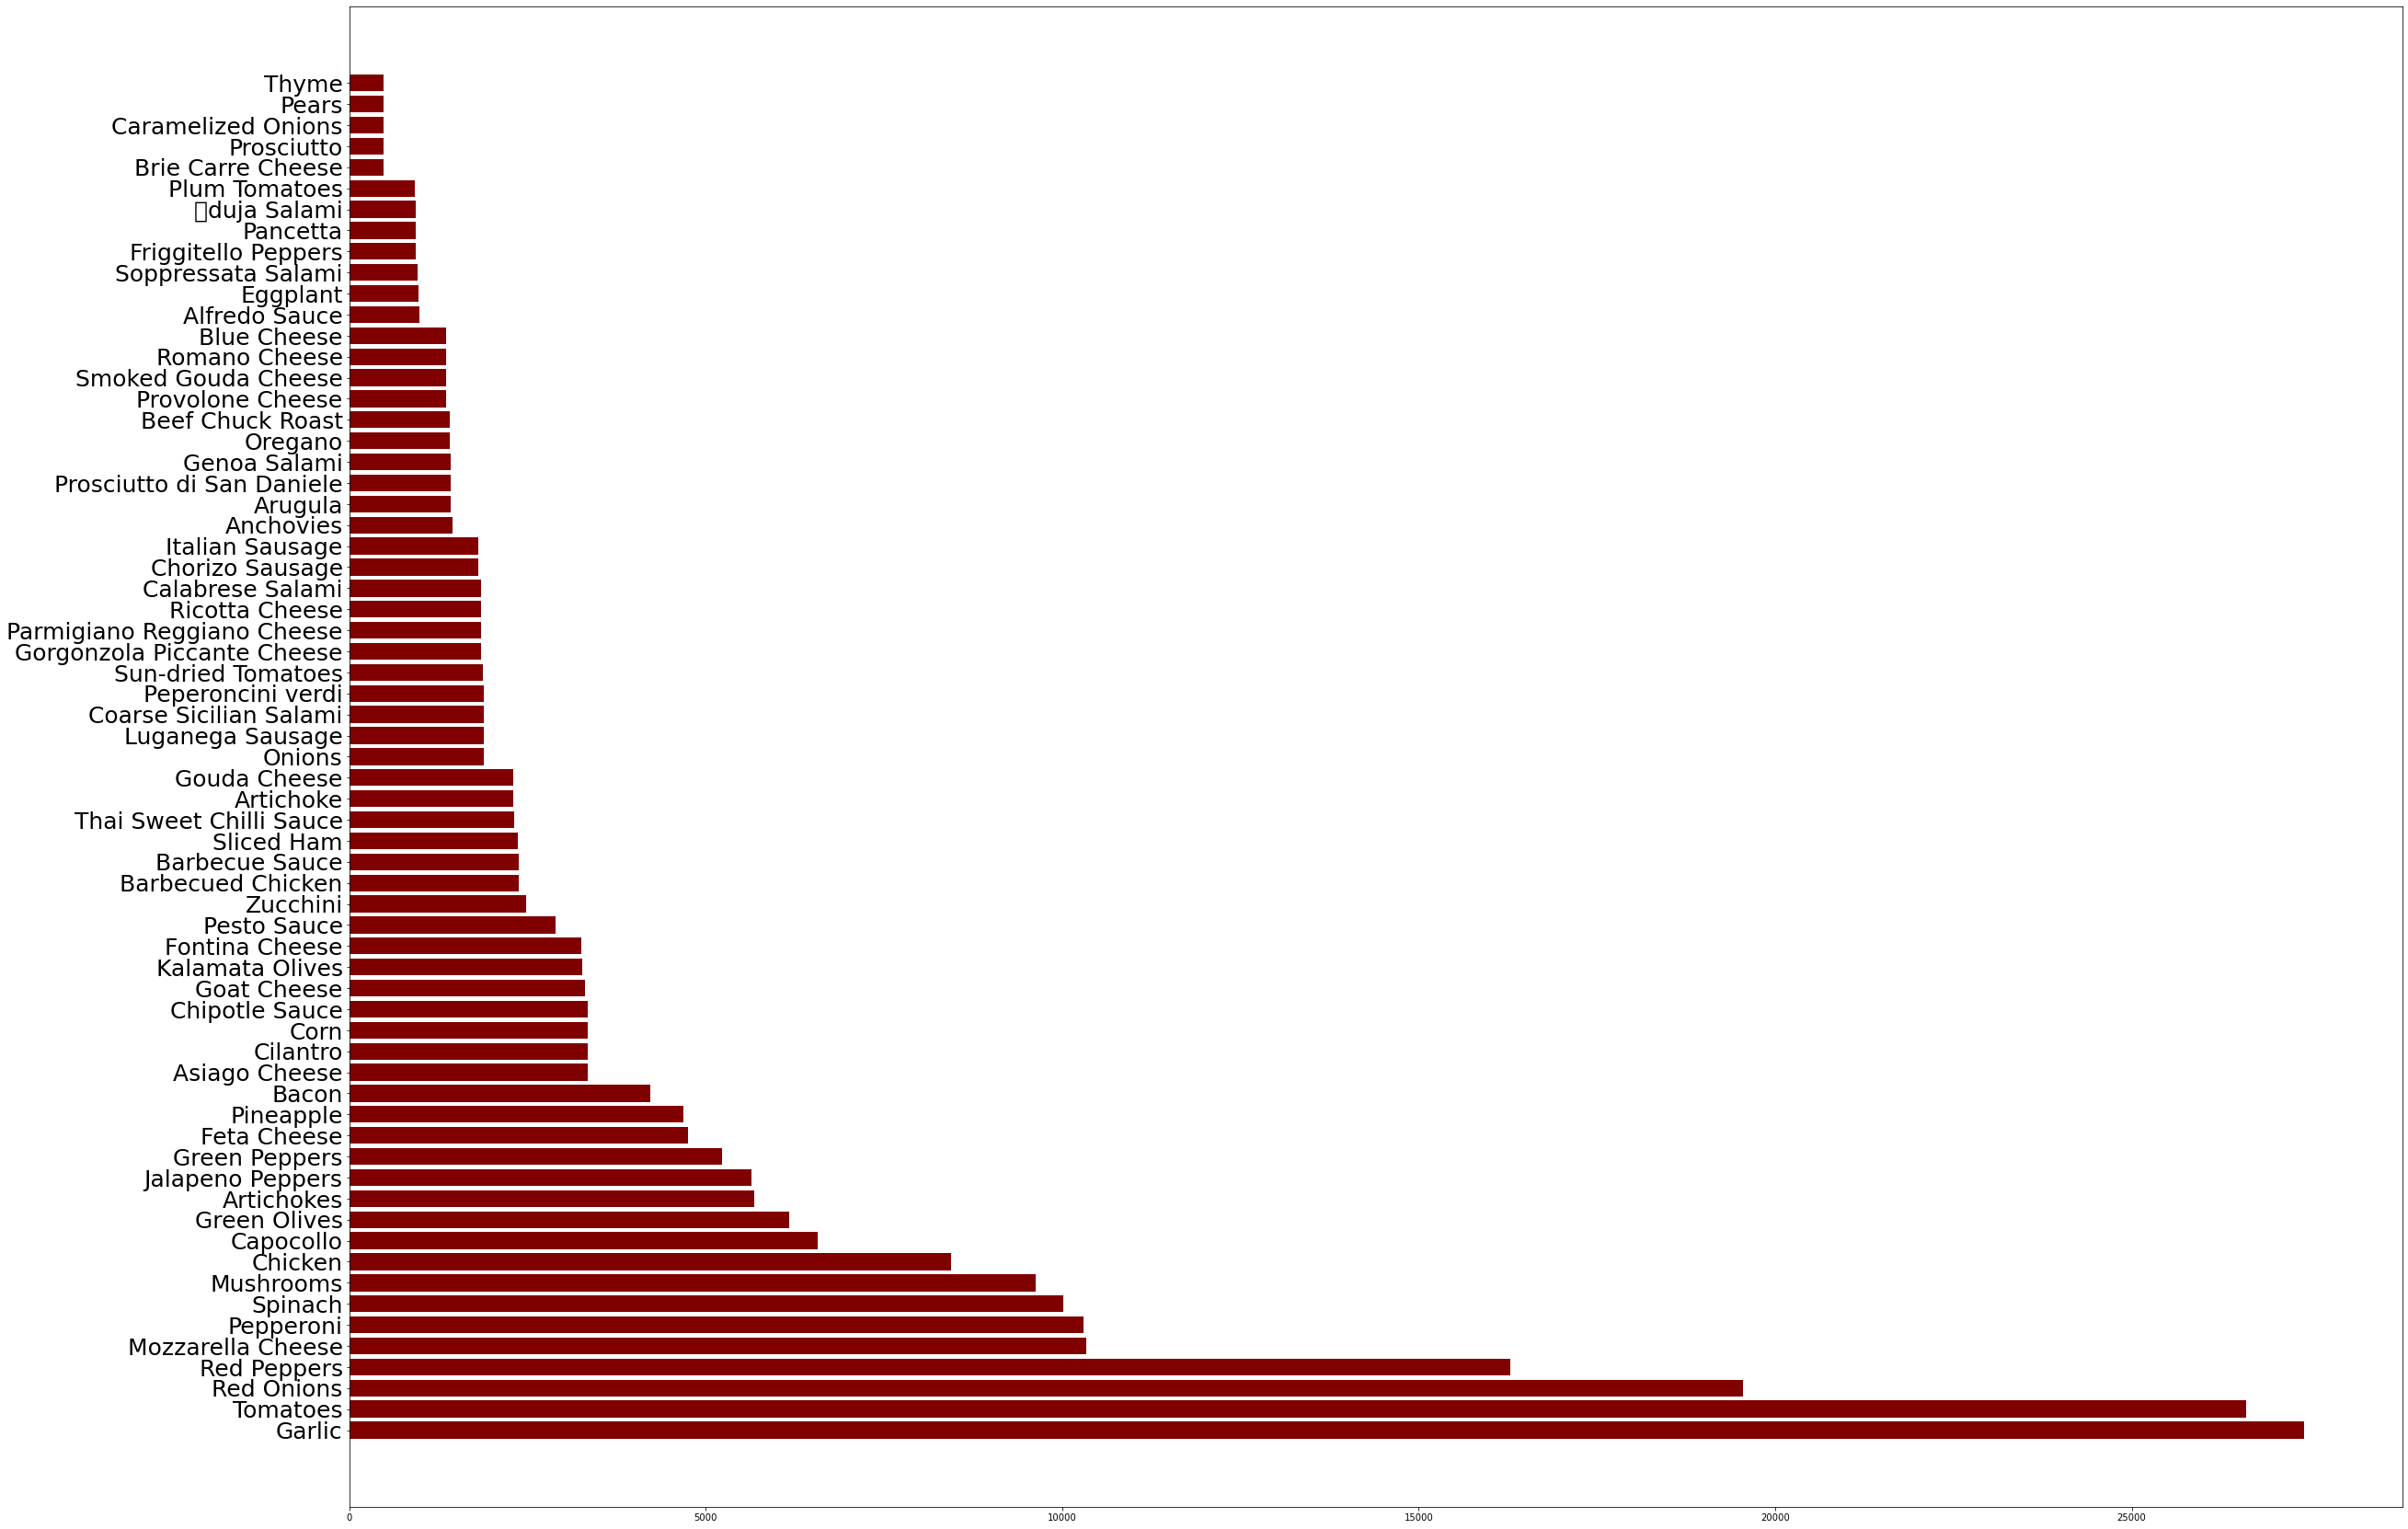

In [24]:
plt.figure(figsize=(40,30))
plt.barh(ing_df['pizza_ingredients'], ing_df['count'], color='maroon')
plt.yticks(fontsize=25)
plt.show()

### Insights from above plot
- Garlic is the most popular ingredient
- Tomato is the second most popular

<div class="alert alert-success"><strong>3.Are there more (or less) sales of a certain type of pizza in a certain month, or day, or time of the da?</strong></div>

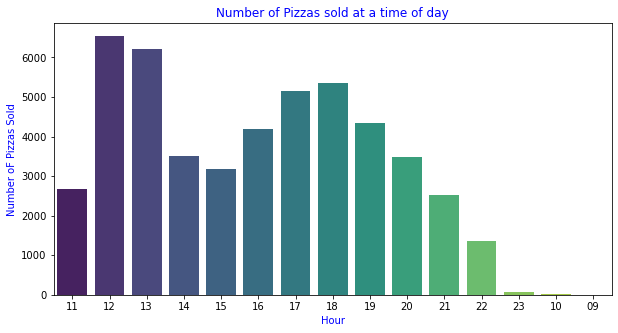

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Hour",palette="viridis")
plt.xlabel("Hour",fontsize=10,color="blue")
plt.ylabel("Number oF Pizzas Sold",fontsize=10,color="blue")
plt.title("Number of Pizzas sold at a time of day",color="blue")
plt.show()

### Insights from above plot
- at 12pm most of the pizzas are sold
- as the number of pizzas sold at 23:00 is pretty low it can be told that the shop can be closed by 22:00 so that employees can reach home safely, and also the costs like electricity and all to maintain is also reduced  

### To find which months has maximum and minimum sales of pizza on basis of pizza_size

In [26]:
df['month'] = df['order_date'].apply(lambda x : x.strftime('%B'))

In [27]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
# After grouping, we summed up the quantity of pizzas ordered in each order
pizzaSizeMonthlySales = df.groupby(['month','pizza_size']).sum()['quantity']
pizzaSizeMonthlySales = pizzaSizeMonthlySales.unstack().reindex(index=months)
# Replacing NaN with 0 where there are no sales of pizza in a given month and size
pizzaSizeMonthlySales = pizzaSizeMonthlySales.fillna(0)
pizzaSizeMonthlySales

pizza_size,L,M,S,XL,XXL
month,,,,,
January,1640.0,1311.0,1229.0,50.0,2.0
February,1521.0,1210.0,1189.0,38.0,3.0
March,1651.0,1313.0,1253.0,41.0,3.0
April,1541.0,1390.0,1151.0,65.0,4.0
May,1668.0,1338.0,1265.0,54.0,3.0
June,1590.0,1335.0,1131.0,49.0,2.0
July,1697.0,1396.0,1249.0,50.0,0.0
August,1527.0,1331.0,1264.0,44.0,2.0
September,1511.0,1188.0,1152.0,36.0,3.0


In [28]:
pizzaSizeMonthlySales[(pizzaSizeMonthlySales == pizzaSizeMonthlySales.max().max()) | (pizzaSizeMonthlySales == pizzaSizeMonthlySales.min().min())]

pizza_size,L,M,S,XL,XXL
month,,,,,
January,NaN,NaN,NaN,NaN,NaN
February,NaN,NaN,NaN,NaN,NaN
March,NaN,NaN,NaN,NaN,NaN
April,NaN,NaN,NaN,NaN,NaN
May,NaN,NaN,NaN,NaN,NaN
June,NaN,NaN,NaN,NaN,NaN
July,1697.0,NaN,NaN,NaN,0.0
August,NaN,NaN,NaN,NaN,NaN
September,NaN,NaN,NaN,NaN,NaN


*From the above table it is observed that in the month of **July** the sales of Large pizza are maximum(1657) and sales of XXL pizza were minimum(0)*

Graphical representation of sales of different sizes of pizza over the months of year

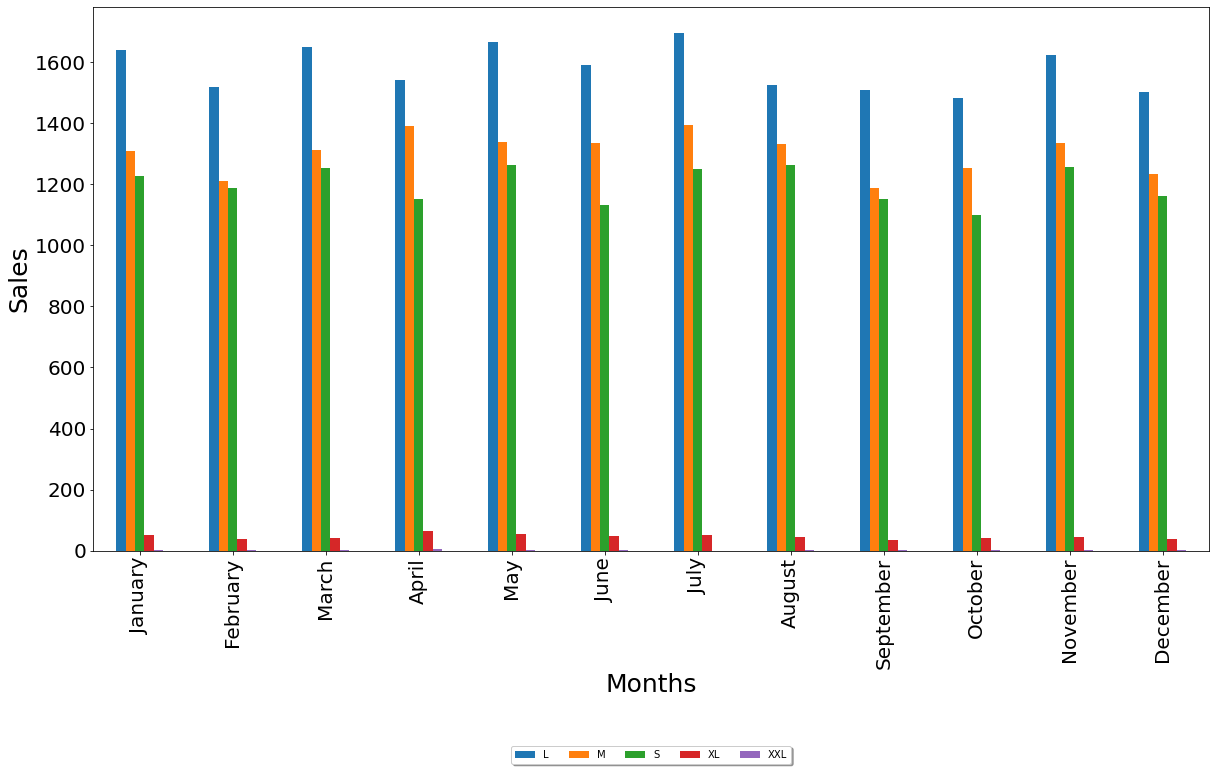

In [29]:
pizzaSizeMonthlySales.plot(kind='bar',figsize=(20, 10),fontsize=20)
plt.xlabel('Months',fontsize=25)
plt.ylabel('Sales',fontsize=25)
# Positioning the legend box outside of the plot by setting anchor
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35),fancybox=True, shadow=True, ncol=5)
plt.show()

### To find which months has maximum and minimum sales of pizza on basis of pizza_category

In [30]:
pizzaCategoryMonthlySales = df.groupby(['month','pizza_category']).sum()['quantity']
pizzaCategoryMonthlySales = pizzaCategoryMonthlySales.unstack().reindex(index=months)
pizzaCategoryMonthlySales = pizzaCategoryMonthlySales.fillna(0)
pizzaCategoryMonthlySales

pizza_category,Chicken,Classic,Supreme,Veggie
month,,,,
January,913,1257,1044,1018
February,875,1178,964,944
March,994,1236,991,1040
April,924,1253,1013,961
May,939,1324,1045,1020
June,910,1199,1040,958
July,963,1331,1041,1057
August,934,1283,991,960
September,900,1202,877,911


From above table it is observed that maximum(1305) sales of pizza occured in the month of July which is of type Classic and minimum(808) sales of pizza occured in month of October of type Chicken

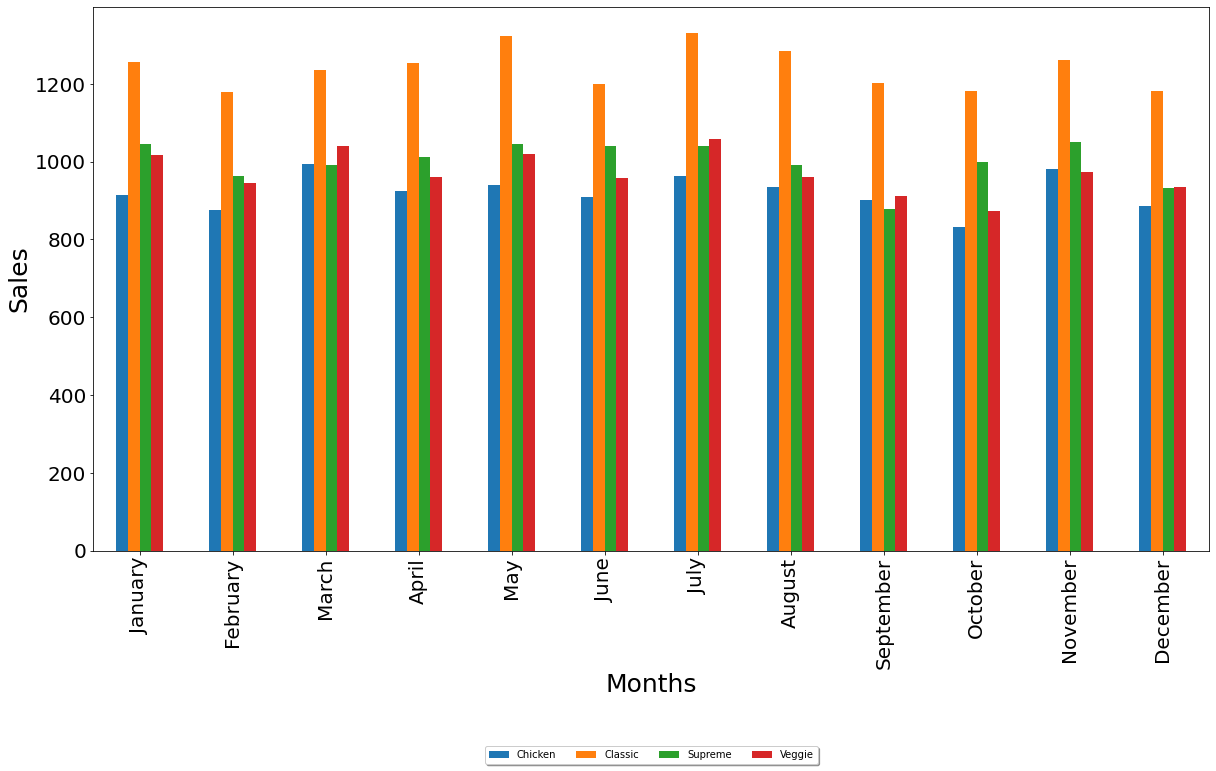

In [31]:
pizzaCategoryMonthlySales.plot(kind='bar',figsize=(20, 10),fontsize=20)
plt.xlabel('Months',fontsize=25)
plt.ylabel('Sales',fontsize=25)
# Positioning the legend box outside of the plot by setting anchor
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35),fancybox=True, shadow=True, ncol=5)
plt.show()

<div class="alert alert-success"><strong>4.Which pizza sizes are sold more often, which type, which ingerdients, etc.</strong></div>

In [32]:
sales_df = df.groupby(['pizza_size','pizza_category']).sum()['quantity'].to_frame()
sales_df = sales_df.reset_index()
sales_df

,pizza_size,pizza_category,quantity
0,L,Chicken,4932
1,L,Classic,4057
2,L,Supreme,4564
3,L,Veggie,5403
4,M,Chicken,3894
5,M,Classic,4112
6,M,Supreme,4046
7,M,Veggie,3583
8,S,Chicken,2224
9,S,Classic,6139


In [33]:
largePizza_df = sales_df[sales_df['pizza_size'] == 'L']
largePizza_df

,pizza_size,pizza_category,quantity
0,L,Chicken,4932
1,L,Classic,4057
2,L,Supreme,4564
3,L,Veggie,5403


In [34]:
largePizza_df[largePizza_df['quantity'] == largePizza_df['quantity'].max()]
# Veggie category has most sales in the large pizza size 

,pizza_size,pizza_category,quantity
3,L,Veggie,5403


In [35]:
df[(df['pizza_category'] == 'Veggie') & (df['pizza_size'] == 'L')]['ingredients_list'].explode().unique()

array(['Mozzarella Cheese', 'Provolone Cheese', 'Smoked Gouda Cheese',
       'Romano Cheese', 'Blue Cheese', 'Garlic', 'Spinach', 'Artichokes',
       'Tomatoes', 'Sun-dried Tomatoes', 'Pesto Sauce', 'Red Peppers',
       'Jalapeno Peppers', 'Red Onions', 'Cilantro', 'Corn',
       'Chipotle Sauce', 'Ricotta Cheese', 'Gorgonzola Piccante Cheese',
       'Parmigiano Reggiano Cheese', 'Mushrooms', 'Feta Cheese',
       'Green Peppers', 'Zucchini', 'Green Olives', 'Kalamata Olives',
       'Plum Tomatoes', 'Eggplant'], dtype=object)

In [36]:
large_veggie_df=df[(df['pizza_category'] == 'Veggie') & (df['pizza_size'] == 'L')]['ingredients_list'].explode().value_counts()
large_veggie_df

Garlic                        4805
Mozzarella Cheese             2632
Red Onions                    2068
Tomatoes                      1830
Spinach                       1597
Red Peppers                   1457
Smoked Gouda Cheese           1359
Romano Cheese                 1359
Blue Cheese                   1359
Provolone Cheese              1359
Parmigiano Reggiano Cheese    1273
Gorgonzola Piccante Cheese    1273
Ricotta Cheese                1273
Mushrooms                      954
Feta Cheese                    895
Chipotle Sauce                 844
Cilantro                       844
Corn                           844
Jalapeno Peppers               844
Artichokes                     833
Sun-dried Tomatoes             643
Zucchini                       613
Pesto Sauce                    469
Green Peppers                  423
Kalamata Olives                364
Plum Tomatoes                  364
Eggplant                       190
Green Olives                    94
Name: ingredients_li

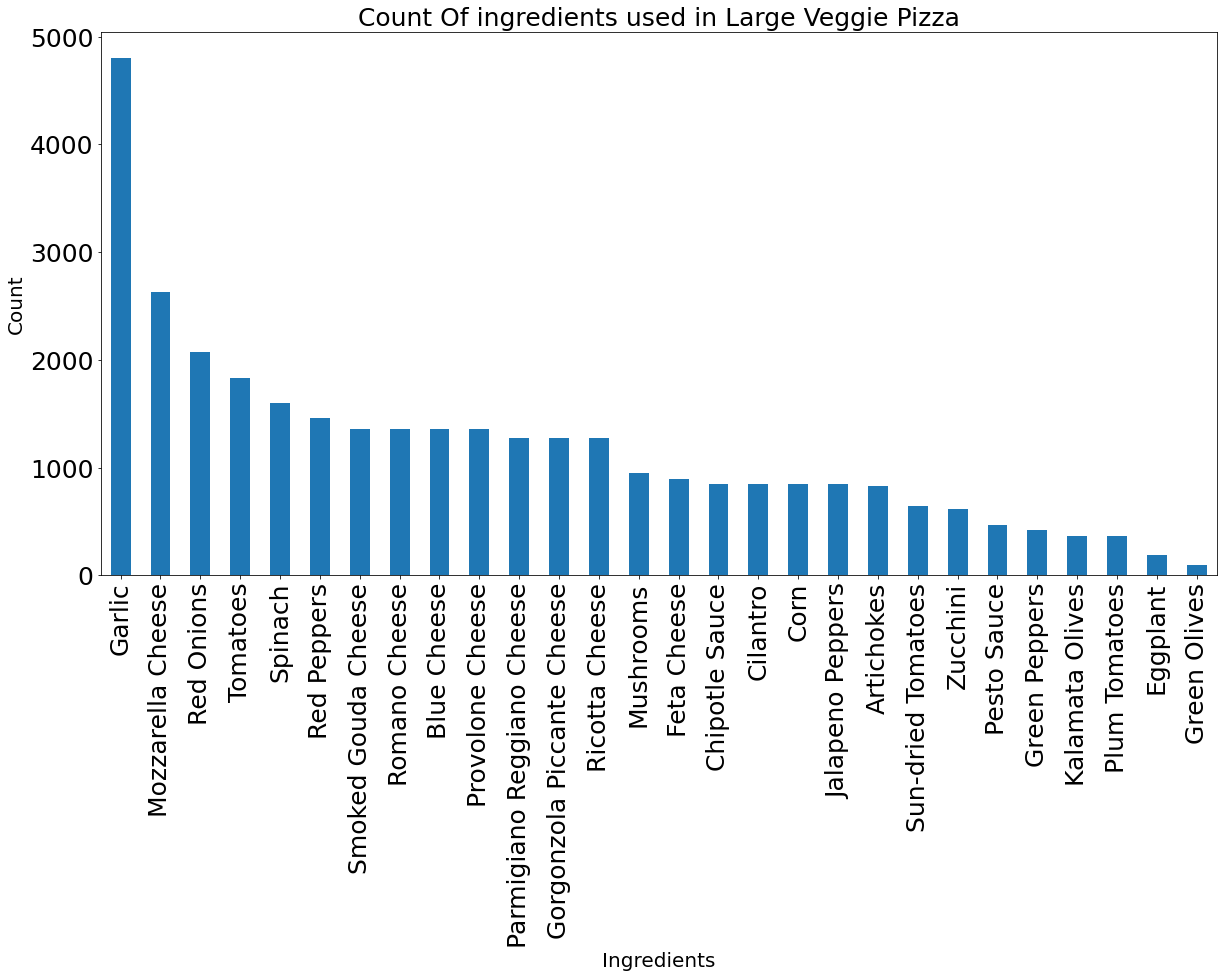

In [37]:
large_veggie_df.plot(kind='bar',figsize=(20,10),fontsize=25)
plt.xlabel('Ingredients',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Count Of ingredients used in Large Veggie Pizza',fontsize=25)
plt.show()

<div class="alert alert-success"><strong>5.Is there a time of the day when there is a peak sale? If yes, does that depend on the day of the week, or month?</strong></div>

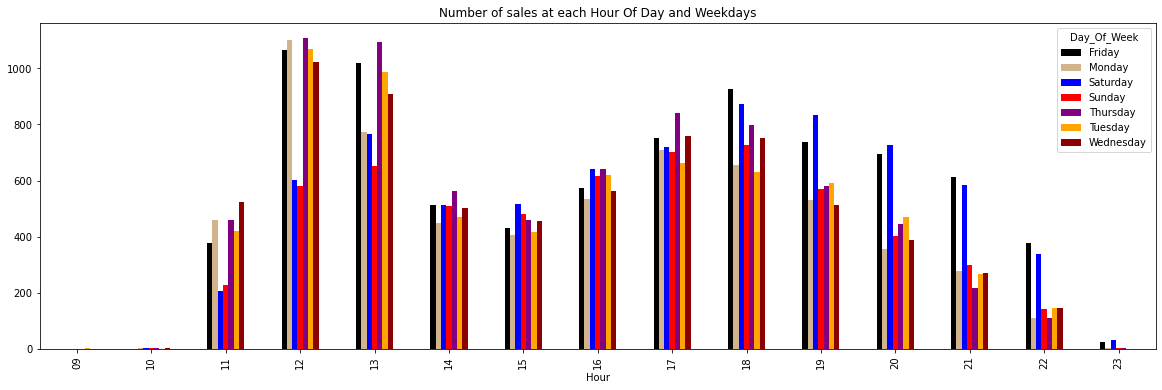

In [38]:
hour_week=pd.crosstab(df['Hour'], df['Day_Of_Week'])
hour_week.plot(kind='bar', 
               color=['black','tan','blue','red','purple','orange','darkred','navy'],
               title='Number of sales at each Hour Of Day and Weekdays',
               figsize=(20, 6))
plt.show()

### Insights from above plot
- it can be observed that the peak is at 12:00 pm and the peak is on weekdays
- During weekends there is a slight higher peak during evening i.e from 4-7 pm

### Calculating the frequency of orders on Friday from 0:00 (12:00 Am) to 23:59 (11:59 Pm) 

Creating a DataFrame named ' Friday_df ' 

In [39]:
friday_df = df[df.Day_Of_Week == 'Friday'].groupby('Hour').size()
friday_df

Hour
11     379
12    1064
13    1020
14     513
15     432
16     572
17     752
18     926
19     736
20     695
21     613
22     378
23      26
dtype: int64

Ploting orders booked in every hour on Friday

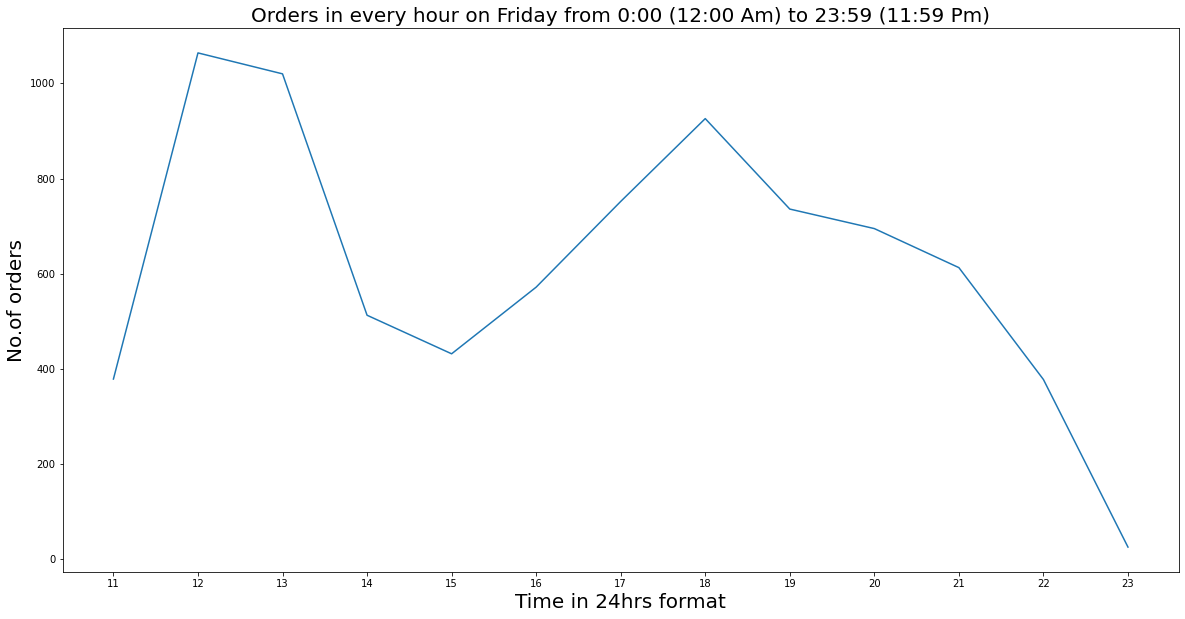

In [40]:
# plot of time vs No_of_oders
plt.figure(figsize=(20,10))
plt.plot(friday_df)
plt.ylabel('No.of orders',fontsize=20)
plt.xlabel('Time in 24hrs format',fontsize=20)
plt.title('Orders in every hour on Friday from 0:00 (12:00 Am) to 23:59 (11:59 Pm)',fontsize=20)
plt.show()

### Insights from above plot
- From 10:00 (10:00 Am) the orders escalated till 12:00 (12:00 noon) 
- The orders declined from 12:00 (12:00 noon) to 15:00 (3:00 Pm)
- From  15:00 (3:00 Pm) the orders went up till 18:00 (6:00 Pm) and declined slowly after 18:00 (6:00 Pm)

In [41]:
df['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [42]:
hour_month=pd.crosstab(df['Hour'], df['month'])

In [43]:
hour_month.style.background_gradient(cmap='hot')

month,April,August,December,February,January,July,June,March,May,November,October,September
Hour,,,,,,,,,,,,
09,0,0,0,0,0,0,0,0,0,4,0,0
10,3,0,0,2,0,3,2,3,1,0,2,1
11,223,259,202,232,205,258,193,193,225,230,208,244
12,572,532,531,503,571,505,629,598,548,590,482,482
13,521,438,546,471,512,586,484,592,494,523,561,475
14,254,341,238,327,358,269,349,283,320,247,252,283
15,257,242,284,247,268,293,289,236,265,321,235,233
16,336,362,314,293,357,374,341,404,377,383,272,372
17,491,404,383,459,426,422,391,485,489,399,369,425


### Insights from above plot
- Hence most sales on most month occured at 12pm and 1pm

## To find a hour in a day of a week with maximum orders

In [44]:
day_df = df.Day_Of_Week.value_counts().to_frame().reset_index()
day_df = day_df.rename(columns ={'index':'day','Day_Of_Week':'no_of_orders'})
day_df

,day,no_of_orders
0,Friday,8106
1,Saturday,7355
2,Thursday,7323
3,Wednesday,6797
4,Tuesday,6753
5,Monday,6369
6,Sunday,5917


In [62]:
sample = df.groupby(['month','Day_Of_Week','Hour']).size()
sample.sort_values(ascending=False,inplace=True)
sample.head(10)

month     Day_Of_Week  Hour
November  Monday       12      151
October   Thursday     13      141
June      Monday       12      135
December  Monday       12      134
March     Tuesday      13      133
January   Thursday     13      132
March     Friday       12      125
January   Thursday     12      123
February  Friday       13      123
December  Tuesday      13      122
dtype: int64

In [46]:
sample = sample.unstack().fillna(0)
sample

Hour                    09   10    11     12     13    14    15    16     17  \
month     Day_Of_Week                                                          
April     Friday       0.0  0.0  17.0   84.0   79.0  52.0  26.0  36.0   69.0   
          Monday       0.0  0.0  38.0  100.0   87.0  22.0  36.0  41.0   62.0   
          Saturday     0.0  3.0   7.0   46.0   71.0  40.0  37.0  53.0   56.0   
          Sunday       0.0  0.0  17.0   41.0   49.0  34.0  33.0  36.0   71.0   
          Thursday     0.0  0.0  51.0  112.0   80.0  29.0  45.0  69.0  111.0   
...                    ...  ...   ...    ...    ...   ...   ...   ...    ...   
September Saturday     0.0  0.0  30.0   40.0   56.0  62.0  43.0  32.0   63.0   
          Sunday       0.0  0.0  13.0   48.0   39.0  33.0  30.0  37.0   59.0   
          Thursday     0.0  1.0  32.0   47.0   68.0  18.0  16.0  68.0   49.0   
          Tuesday      0.0  0.0  42.0  101.0  101.0  56.0  54.0  82.0   53.0   
          Wednesday    0.0  0.0  57.0   95.0   82.0  37.0  35.0  79.0   85.0   

Hour                     18    19    20    21    22   23  
month     Day_Of_Week                                     
April     Friday       70.0  62.0  57.0  30.0  43.0  3.0  
          Monday       64.0  46.0  37.0  42.0   2.0  0.0  
          Saturday     63.0  58.0  76.0  34.0  27.0  1.0  
          Sunday       45.0  62.0  14.0  17.0  15.0  0.0  
          Thursday     75.0  49.0  35.0  13.0  21.0  0.0  
...                     ...   ...   ...   ...   ...  ...  
September Saturday     71.0  66.0  51.0  47.0  18.0  0.0  
          Sunday       54.0  48.0  34.0  37.0   7.0  0.0  
          Thursday     49.0  36.0  20.0   9.0   1.0  0.0  
          Tuesday      65.0  53.0  54.0  34.0  21.0  0.0  
          Wednesday    51.0  58.0  29.0  36.0  12.0  0.0  

[83 rows x 15 columns]

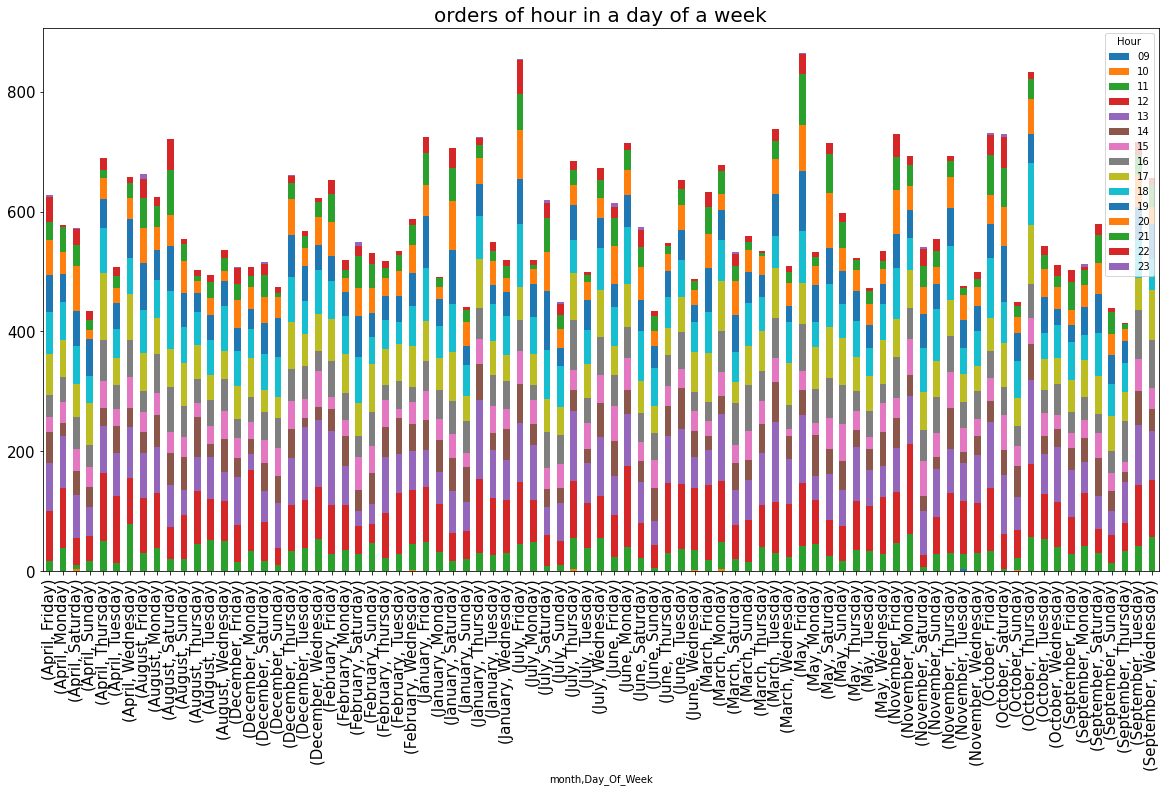

In [47]:
sample.plot(kind='bar',figsize=(20,10),stacked=True,fontsize=15)
plt.title('orders of hour in a day of a week',fontsize=20)
plt.show()

## Orders of different pizza categories from January to December

Creating a series named ' month_pizza_category_series ' and grouping records with similar month and pizza_category

In [48]:
month_pizza_category_series = df.groupby(['month','pizza_category']).sum()['quantity'] 
month_pizza_category_series 

month      pizza_category
April      Chicken            924
           Classic           1253
           Supreme           1013
           Veggie             961
August     Chicken            934
           Classic           1283
           Supreme            991
           Veggie             960
December   Chicken            885
           Classic           1182
           Supreme            933
           Veggie             935
February   Chicken            875
           Classic           1178
           Supreme            964
           Veggie             944
January    Chicken            913
           Classic           1257
           Supreme           1044
           Veggie            1018
July       Chicken            963
           Classic           1331
           Supreme           1041
           Veggie            1057
June       Chicken            910
           Classic           1199
           Supreme           1040
           Veggie             958
March      Chicken    

Unstacking the ' month_pizza_category_series ' and reindexing series to display the records in order of months

In [49]:
month_pizza_category_series = month_pizza_category_series.unstack().reindex(index=months)
month_pizza_category_series

pizza_category,Chicken,Classic,Supreme,Veggie
month,,,,
January,913,1257,1044,1018
February,875,1178,964,944
March,994,1236,991,1040
April,924,1253,1013,961
May,939,1324,1045,1020
June,910,1199,1040,958
July,963,1331,1041,1057
August,934,1283,991,960
September,900,1202,877,911


Ploting orders of different pizza categories from January to December

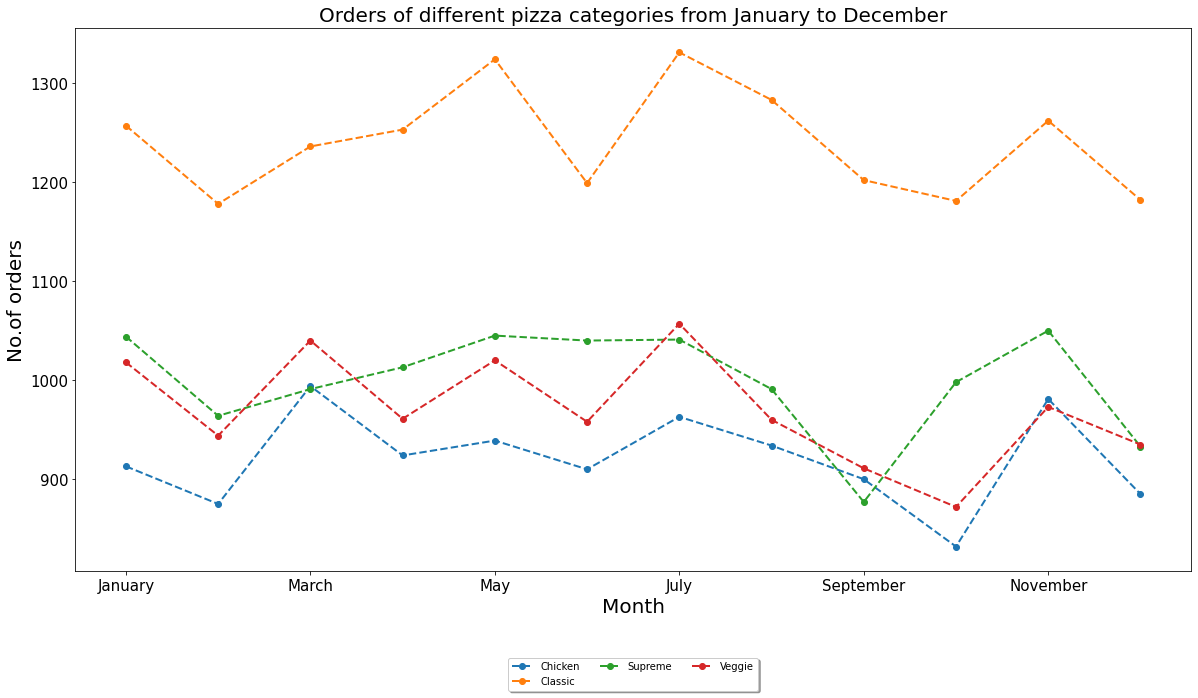

In [50]:
month_pizza_category_series.plot(marker='o',figsize=(20,10),fontsize=15,linestyle='dashed',linewidth=2)
plt.xlabel('Month',fontsize=20)
plt.ylabel('No.of orders',fontsize=20)
plt.title('Orders of different pizza categories from January to December',fontsize=20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),fancybox=True, shadow=True, ncol=3)
plt.show()

## To calculate the revenue generated from different pizza sizes over the months

In [51]:
monthly_pizza_size_revenue_df = df.groupby(['month','pizza_size']).sum()['total_price']
monthly_pizza_size_revenue_df

month      pizza_size
April      L             30622.70
           M             22176.75
           S             14136.05
           XL             1657.50
           XXL             143.80
August     L             30267.90
           M             21175.50
           S             15640.95
           XL             1122.00
           XXL              71.90
December   L             29712.20
           M             19650.50
           S             14333.50
           XL              969.00
           XXL              35.95
February   L             30077.90
           M             19263.00
           S             14741.85
           XL              969.00
           XXL             107.85
January    L             32399.40
           M             20943.50
           S             15103.50
           XL             1275.00
           XXL              71.90
July       L             33583.05
           M             22224.50
           S             15475.35
           XL             

Unstacking the DataFrame and reindexing according to months to display the  

In [52]:
monthly_pizza_size_revenue_df = monthly_pizza_size_revenue_df.unstack().reindex(index=months)
monthly_pizza_size_revenue_df

pizza_size,L,M,S,XL,XXL
month,,,,,
January,32399.40,20943.50,15103.50,1275.0,71.90
February,30077.90,19263.00,14741.85,969.0,107.85
March,32752.35,20952.50,15538.90,1045.5,107.85
April,30622.70,22176.75,14136.05,1657.5,143.80
May,32970.50,21302.50,15644.90,1377.0,107.85
June,31493.80,21367.00,14048.00,1249.5,71.90
July,33583.05,22224.50,15475.35,1275.0,NaN
August,30267.90,21175.50,15640.95,1122.0,71.90
September,29874.10,18956.75,14323.35,918.0,107.85


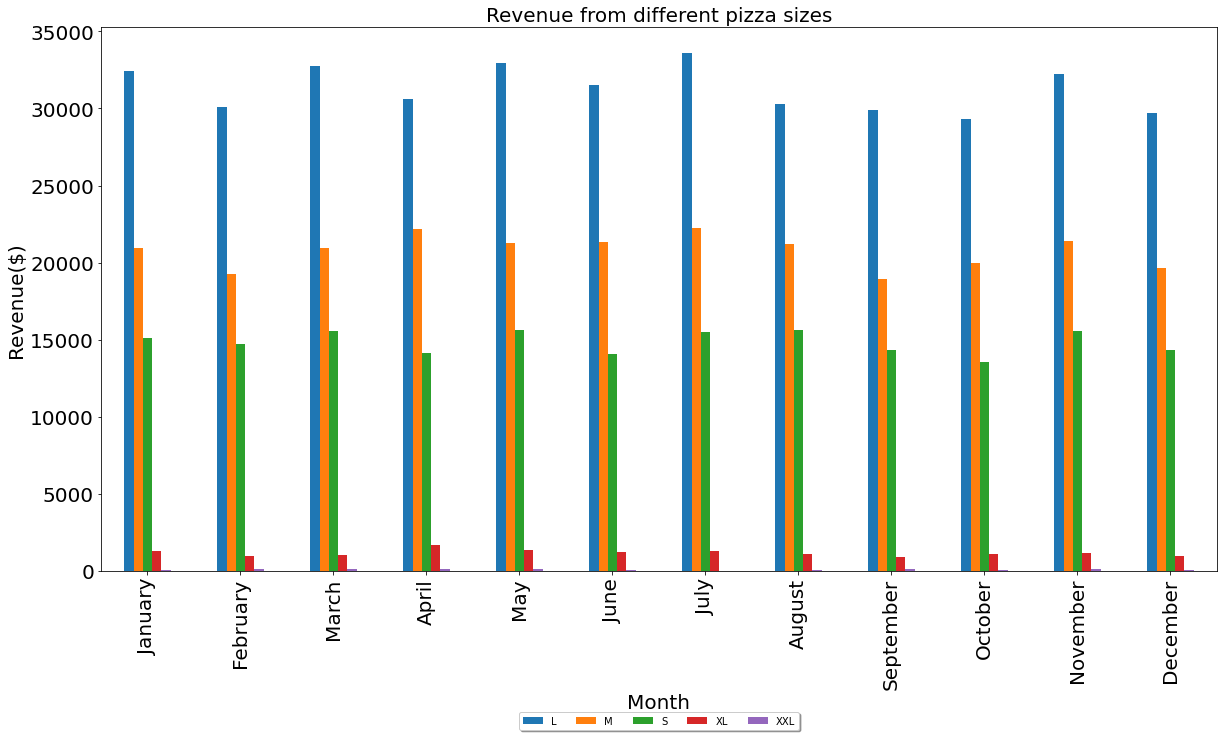

In [53]:
monthly_pizza_size_revenue_df.plot(kind='bar',fontsize=20,figsize=(20,10))
plt.xlabel('Month',fontsize=20)
plt.ylabel('Revenue($)',fontsize=20)
plt.title('Revenue from different pizza sizes',fontsize=20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),fancybox=True, shadow=True, ncol=5)
plt.show()

### Insights from above graph
- It has been observed that Large size pizza contributed to most revenue

## To calculate orders of different pizza categories booked from user given start_date and end_date

Creating new dataframe named ' sample_df ' that holds records in user given interval

In [54]:
#filtering the dates between time interval
start_date = input("Enter start date in (YYYY-MM-DD) format: ")
end_date = input("Enter end date in (YYYY-MM-DD) format: ")
sample_df = df[(df['order_date'] >= start_date) & (df['order_date'] <= end_date)]
sample_df

Enter start date in (YYYY-MM-DD) format: 2015-02-01
Enter end date in (YYYY-MM-DD) format: 2015-02-07


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,ingredients_list,Day_Of_Week,Day,Hour,month
4156,4157,1846,big_meat_s,1,2015-02-01,11:32:07,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza,"[Bacon, Pepperoni, Italian Sausage, Chorizo Sa...",Sunday,1,11,February
4157,4158,1847,classic_dlx_m,1,2015-02-01,11:36:27,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,"[Pepperoni, Mushrooms, Red Onions, Red Peppers...",Sunday,1,11,February
4158,4159,1848,classic_dlx_l,1,2015-02-01,11:40:46,20.50,20.50,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,"[Pepperoni, Mushrooms, Red Onions, Red Peppers...",Sunday,1,11,February
4159,4160,1848,ital_cpcllo_m,1,2015-02-01,11:40:46,16.00,16.00,M,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza,"[Capocollo, Red Peppers, Tomatoes, Goat Cheese...",Sunday,1,11,February
4160,4161,1849,five_cheese_l,1,2015-02-01,11:40:47,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,"[Mozzarella Cheese, Provolone Cheese, Smoked G...",Sunday,1,11,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,5190,2299,prsc_argla_m,1,2015-02-07,21:55:00,16.50,16.50,M,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza,"[Prosciutto di San Daniele, Arugula, Mozzarell...",Saturday,7,21,February
5190,5191,2299,the_greek_l,1,2015-02-07,21:55:00,20.50,20.50,L,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza,"[Kalamata Olives, Feta Cheese, Tomatoes, Garli...",Saturday,7,21,February
5191,5192,2300,four_cheese_l,1,2015-02-07,21:59:07,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,"[Ricotta Cheese, Gorgonzola Piccante Cheese, M...",Saturday,7,21,February
5192,5193,2301,calabrese_m,1,2015-02-07,22:10:57,16.25,16.25,M,Supreme,"慛duja Salami, Pancetta, Tomatoes, Red Onions, ...",The Calabrese Pizza,"[慛duja Salami, Pancetta, Tomatoes, Red Onions,...",Saturday,7,22,February


Creating new dataframe named ' interval_df ' and inserting records grouped by ' order_date ' & ' pizza_category ' from sample_df

In [55]:
# counting the order from each pizza catgory on the given date
interval_df = sample_df.groupby(['order_date','pizza_category']).sum()['quantity'] 
interval_df

order_date  pizza_category
2015-02-01  Chicken           49
            Classic           58
            Supreme           50
            Veggie            34
2015-02-02  Chicken           32
            Classic           41
            Supreme           36
            Veggie            36
2015-02-03  Chicken           28
            Classic           46
            Supreme           40
            Veggie            45
2015-02-04  Chicken           29
            Classic           42
            Supreme           30
            Veggie            37
2015-02-05  Chicken           23
            Classic           44
            Supreme           41
            Veggie            25
2015-02-06  Chicken           28
            Classic           51
            Supreme           38
            Veggie            36
2015-02-07  Chicken           37
            Classic           31
            Supreme           35
            Veggie            33
Name: quantity, dtype: int64

In [56]:
# counting the order from each pizza catgory on the given date
interval_df = sample_df.groupby(['order_date','pizza_category']).sum()['quantity'] 
interval_df

order_date  pizza_category
2015-02-01  Chicken           49
            Classic           58
            Supreme           50
            Veggie            34
2015-02-02  Chicken           32
            Classic           41
            Supreme           36
            Veggie            36
2015-02-03  Chicken           28
            Classic           46
            Supreme           40
            Veggie            45
2015-02-04  Chicken           29
            Classic           42
            Supreme           30
            Veggie            37
2015-02-05  Chicken           23
            Classic           44
            Supreme           41
            Veggie            25
2015-02-06  Chicken           28
            Classic           51
            Supreme           38
            Veggie            36
2015-02-07  Chicken           37
            Classic           31
            Supreme           35
            Veggie            33
Name: quantity, dtype: int64

Ploting Orders of different pizza categories booked from user input

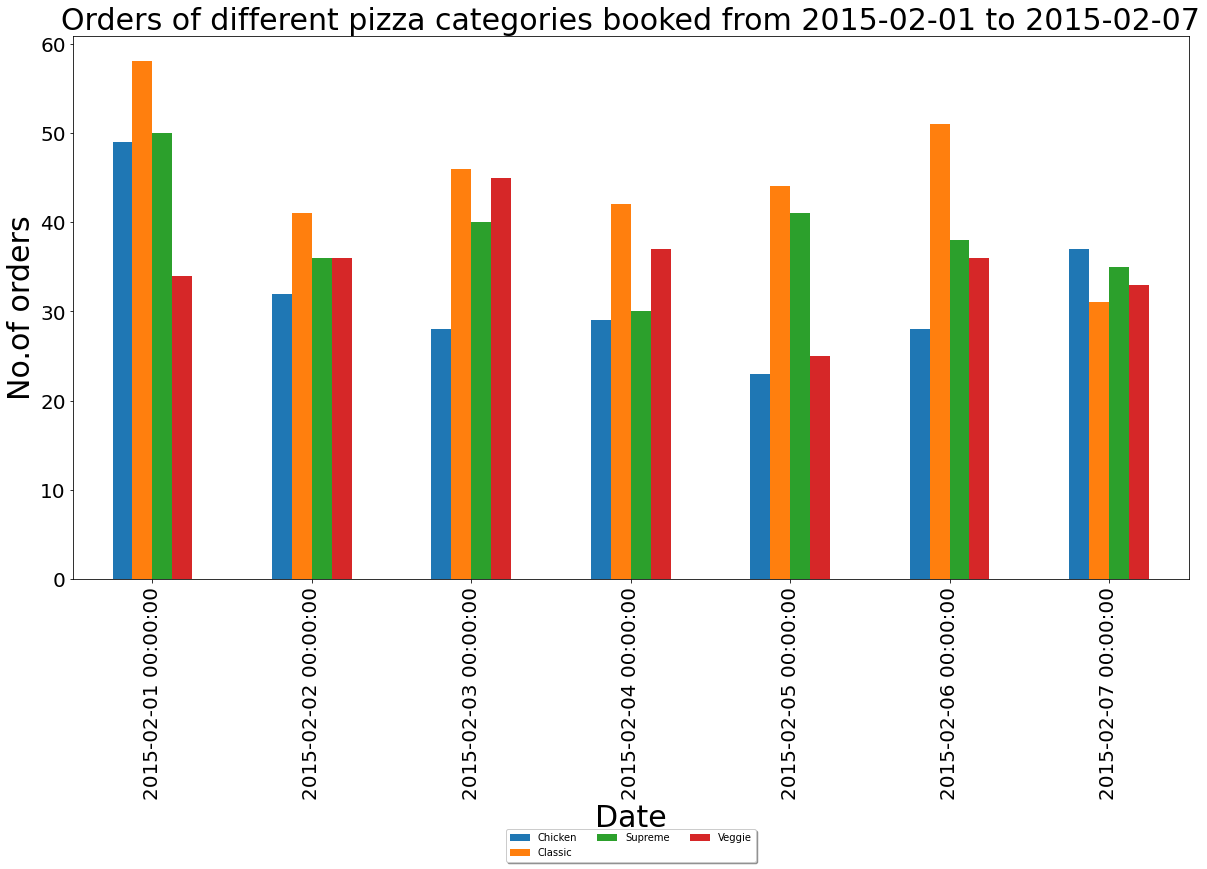

In [57]:
# unstacking of multi index dataframe and fitting a bar plot 
interval_df.unstack().plot(kind='bar',figsize=(20, 10),fontsize=20)
plt.title('Orders of different pizza categories booked from '+start_date+' to '+end_date,fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.ylabel('No.of orders',fontsize=30)
# Positioning the legend box outside of the plot by setting anchor
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.45),fancybox=True, shadow=True, ncol=3)
plt.show()

# Ploting a heat map to view orders from a particular pizza_category in a specfic month

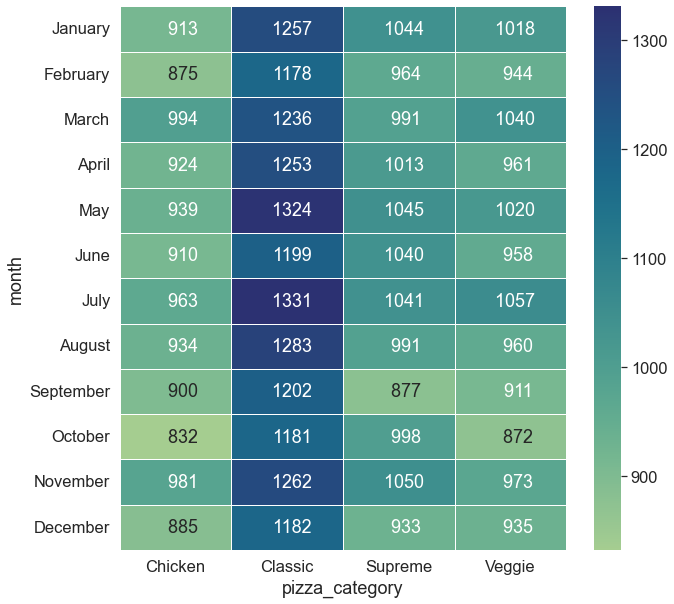

In [58]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
sns.heatmap(month_pizza_category_series ,cmap='crest',annot=True,fmt='6g',linewidth=.5)
plt.show()
# The number in each square block represents no.of orders contributing to specfic pizza_category from particular month 

# Showing Entire year calendar with number of records 

In [59]:
df_date=df.groupby('order_date').size().reset_index(name='Count')
# df_date['order_date']=pd.to_datetime(df_date['order_date'])
s=pd.Series(data=list(df_date['Count']),index=df_date.order_date) 

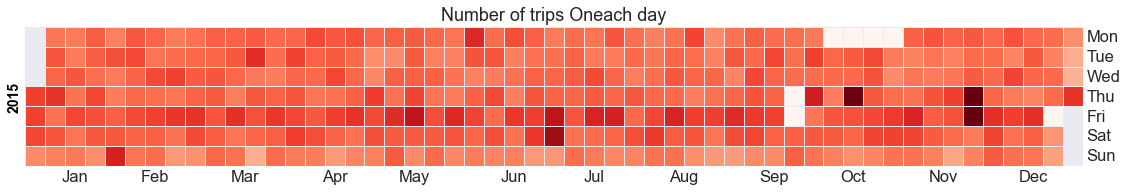

In [60]:
calmap.calendarplot(s, fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Number of trips Oneach day'})
plt.show()

### Insights from above graph
- Highest Number of sales came in the month of November
- resturant was closed only for 7 days

# Showing number of orders grouped by pizzasize,category

In [63]:
df1 = df.groupby(["pizza_size","pizza_category"],as_index=False)[['total_price']].median()
fig = px.treemap(df1, path = [px.Constant("all"), "pizza_size","pizza_category"], 
                 values   ='total_price', color='pizza_size',
                 color_discrete_map={'(?)':'tan', 'Lunch':'navy', 'Dinner':'red'})
fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()

C:\Users\priya\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\priya\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\priya\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### Insights from above graph
- for XXL,XL size only Classic pizza is ordered
- L is the most sold pizza size
- Veggie Small Pizza is the least cost pizza